In [4]:
%load_ext Cython


In [63]:
%%cython -a
cimport numpy as cnp
from libc.stdlib cimport malloc, free

cdef multiplicativeCongruentialMethod(unsigned long long int alpha, int M, unsigned long long int beta , int *randomNums, int noOfRandomNums):
    cdef int j = 1
    randomNums[0] = alpha
    while j < noOfRandomNums:
        randomNums[j] = (randomNums[j - 1] * beta) % M
        j = j + 1
    return [number for number in randomNums[:noOfRandomNums]]
        
cdef main():
    cdef unsigned long long int alpha = 82
    cdef int M = 11
    cdef unsigned long long int beta = 63
    cdef int noOfRandomNums = 10000
    cdef int  i = 0
    cdef int *randomNums = <int *> malloc(noOfRandomNums * sizeof(int))
    
    cdef cnp.ndarray[cnp.int_t, ndim=1] resultArray
    if not randomNums:
        raise MemoryError()

    try:
        resultArray = multiplicativeCongruentialMethod(alpha, M, beta, randomNums, noOfRandomNums)
        while i < noOfRandomNums:
            print(i, end = " ")
            i = i + 1
    finally:
        free(randomNums)



In [26]:
%%cython

from cpython cimport array
import array
cdef array.array a = array.array('i', [1, 2, 3])
cdef int[:] ca = a

print(ca[0])

[6.16e-05, 0.0047432, 0.3652264, 0.1224328, 0.4273256, 0.9040712, 0.6134824, 0.2381448, 0.3371496, 0.9605192, 0.9599784, 0.9183368, 0.7119336, 0.8188872, 0.0543144, 0.1822088, 0.0300776, 0.3159752, 0.3300904, 0.4169608, 0.1059816, 0.1605832, 0.3649064, 0.0977928, 0.5300456, 0.8135112, 0.6403624, 0.3079048, 0.7086696, 0.5675592, 0.7020584, 0.0584968, 0.5042536, 0.8275272, 0.7195944, 0.4087688, 0.4751976, 0.5902152, 0.4465704, 0.3859208, 0.7159016, 0.1244232, 0.5805864, 0.7051528, 0.2967656, 0.8509512, 0.5232424, 0.2896648, 0.3041896, 0.4225992, 0.5401384, 0.5906568, 0.4805736, 0.0041672, 0.3208744, 0.7073288, 0.4643176, 0.7524552, 0.9390504, 0.3068808, 0.6298216, 0.4962632, 0.2122664, 0.3445128, 0.5274856, 0.6163912, 0.4621224, 0.5834248, 0.9237096, 0.1256392, 0.6742184, 0.9148168, 0.4408936, 0.9488072, 0.0581544, 0.4778888, 0.7974376, 0.4026952, 0.0075304, 0.5798408, 0.6477416, 0.8761032, 0.4599464, 0.4158728, 0.0222056, 0.7098312, 0.6570024, 0.5891848, 0.3672296, 0.2766792, 0.3042984,

0.03613953450608933
0.03601520888888886
0.035540621974965214
0.03641918739255018
0.035202942976356046
0.03456956071922541
0.0346974391061453
0.035608223204419885
0.0367931891891892
0.034748471408647084
0.03657292271386428
0.03592980846715333
0.03591124862518086
0.03553804164383558
Hi =  6.661799999999999
delta R = [0.00032152433422301396, 0.0014129873019703976, 0.0003246684126708421, 0.0011740170095838887, 0.0005498268893998071, 0.001412535117222724, 3.5338225463948936e-05, 0.001526388517957833, 0.00036223822444098053, 0.000357151406911449]
0.0019446408827380652 0.0013750687551566797
Moment Verification = 1.0572438406528577
Variance = 0.08343655073618561
Teoretical Dispersion 5.600279917e-07
Dispersion Verification = 0.13791281660543128
{0.0: 739, 0.0714284: 720, 0.1428568: 719, 0.2142852: 698, 0.2857136: 719, 0.357142: 723, 0.4285704: 716, 0.4999988: 724, 0.5714272: 740, 0.6428556000000001: 717, 0.714284: 678, 0.7857124: 685, 0.8571408: 691, 0.9285692000000001: 730}


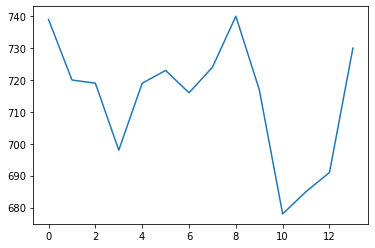

In [9]:
import statistics as st
import math
import matplotlib.pyplot as plt

# def dat(n):  
#     b = 77
#     M = 10000000
#     a0 = 8
#     bvv = [0]*n
#     a = [0]*(n+1)
#     a[0] = a0
#     for i in range(1,n+1):
#         a[i] = (b * a[i - 1]) % M
#         bvv[i - 1] = a[i - 1] / M
#     return bvv

def ver():
    bvv = dat(2000000)
    xv = bvv[999999]
    t = []
    for i in range(1000000,len(bvv)):
        if bvv[i] == xv: t.append(i)
    T=t[1]-t[0]
    for i in range(T):
        if bvv[i]==bvv[T+i]: 
            L = i
            break
    print('T = ',T)
    print('L = ', L)
    return T,L

N = 10000
f = open("data_uni.txt", 'r')
alls = f.read().splitlines()
bvv = [float(i) for i in alls]
print(bvv)
# bvv = d
k = int(1+math.log2(N))
h = (max(bvv)-min(bvv))/14
print('MIN : ',min(bvv))
print('MAX : ',max(bvv))
print("Intervals: ",k)
gr_c = dict.fromkeys([min(bvv)+h*i for i in range(k)],0)
gr_s = dict.fromkeys([min(bvv)+h*i for i in range(k)],0)
for i in bvv:
    for j in gr_c.keys():
        if (i>j and i<j+h):
            gr_c[j]+=1
            gr_s[j]+=i-j+min(bvv)
for i in gr_c.keys():
    if gr_c[i] == 0:
        continue
    print(gr_s[i]/gr_c[i])
hi = 0    
for i in gr_c.keys():
    hi += (gr_c[i] - N/k)**2 / (N / k)
print('Hi = ', hi)

t = 10
Rp = [0]*t
avg = st.mean(bvv)
for j in range(t):
    s = 0
    for i in range(N-t):
        s += bvv[i] * bvv[i + j]
    Rp[j] = s / (N - j - 1) - (N / (N - 1)) * avg**2

delta = [abs(Rp[0] - 1/12)]+[abs(Rp[i]) for i in range(1,t)]
print("delta R =", delta)
print(1.65*(2)**0.5/(12*(N-1)**0.5),1.65/(12*(N-1)**0.5))

MomPerev = abs(avg - 0.5) / (1 / 12 / N)**0.5
print("Moment Verification =" , MomPerev)  
var = 0
for i in range(N):
    var += (bvv[i] - avg)**2
var /= N - 1
print("Variance =" , var)
TeoDis = (0.0056 / N + 0.0028/(N**2) - 0.0083/(N**3))
print("Teoretical Dispersion", TeoDis)
DisPerev = (N - 1) * abs(var - 1 / 12) / (0.0056 / N + 0.0028/(N**2) - 0.0083/(N**3))**0.5 / N
print("Dispersion Verification =" ,DisPerev)

%matplotlib inline
y = [0]*k
j = 0
print(gr_c)
for i in gr_c.keys():
    y[j] = gr_c[i]
    j += 1
x = range(10000)
fig, ax = plt.subplots()
ax.plot(range(k),y)

In [8]:
len(bvv)

10000